<a href="https://colab.research.google.com/github/Kaleriaa/PythonNeu/blob/main/NeuralNet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gzip

In [ ]:
%%bash

rm -Rf train-images-idx3-ubyte.gz
rm -Rf train-labels-idx1-ubyte.gz
wget -q http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
wget -q http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

In [ ]:
with gzip.open('train-labels-idx1-ubyte.gz') as train_label:
  train_data = train_label.read()
  
label_data  = train_data[8:]
assert len(label_data) == 60000
labels = [int(label_byte) for label_byte in label_data]
assert min(labels)==0 and max(labels)==9
assert len(label_data) == 60000

In [ ]:
images = []
size_image = 28*28
with gzip.open('train-images-idx3-ubyte.gz') as train_image:
  train_image.read(4*4)
  i = 0
  for i in range(60000):
    image = train_image.read(size=size_image)
    assert len(image) == size_image
    np_image = np.frombuffer(image, dtype='uint8') / 255
    images.append(np_image)

images = np.array(images)
images.shape

(60000, 784)

In [ ]:
def picture(pixels: np.array):
  plt.imshow(pixels.reshape((28,28)), cmap='gray')
  plt.show()

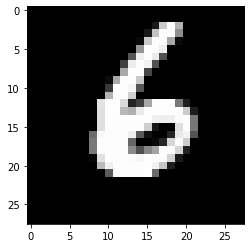

In [ ]:
picture(images[165])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
np_label = np.array(labels).reshape((-1,1))
encoder = OneHotEncoder(categories= 'auto')
hot_label = encoder.fit_transform(np_label).toarray()

hot_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
hot_label[666]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

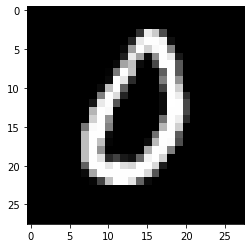

In [ ]:
picture(images[666])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, hot_label)
print(X_train.shape)
print(X_test.shape)

(45000, 784)
(15000, 784)


# Neural Network

In [ ]:
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
model = keras.Sequential()
model.add(keras.layers.Dense(input_shape=(size_image,), units=128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
352/352 [==============================] - 2s 3ms/step - loss: 1.7784 - accuracy: 0.4953
Epoch 2/20
352/352 [==============================] - 1s 3ms/step - loss: 0.7274 - accuracy: 0.8399
Epoch 3/20
352/352 [==============================] - 1s 3ms/step - loss: 0.5245 - accuracy: 0.8695
Epoch 4/20
352/352 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.8810
Epoch 5/20
352/352 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8900
Epoch 6/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3807 - accuracy: 0.8963
Epoch 7/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.9019
Epoch 8/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.9057
Epoch 9/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.9101
Epoch 10/20
352/352 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.9136

In [ ]:
model.evaluate(X_test,  y_test)

469/469 [==============================] - 1s 1ms/step - loss: 0.2453 - accuracy: 0.9296


[0.24534913897514343, 0.9296000003814697]

In [ ]:
y_test[999]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

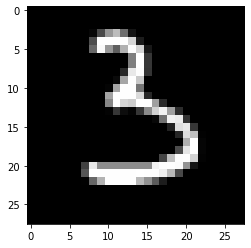

In [ ]:
picture(X_test[999])

In [ ]:
predict_res = model.predict(X_test[999].reshape((1,-1)))


In [ ]:
predict_res.sum()

1.0

In [ ]:
predict_res

array([[3.6654358e-03, 1.8545397e-03, 5.0718482e-03, 6.7364246e-01,
        2.1271417e-05, 3.0016354e-01, 1.4189185e-02, 6.1282626e-05,
        1.0378390e-03, 2.9263337e-04]], dtype=float32)

In [ ]:
y_test[3500]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

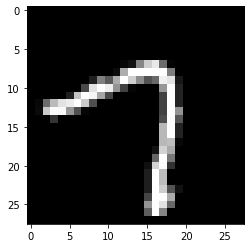

In [ ]:
picture(X_test[3500])

In [ ]:
digit_pr= model.predict(X_test[3500].reshape((1,-1)))
digit_pr.sum()
digit_pr

array([[1.2496801e-03, 6.0850864e-05, 3.1224592e-04, 1.6478992e-03,
        4.1726916e-04, 3.2657546e-03, 3.1423901e-05, 7.7064717e-01,
        1.5710416e-03, 2.2079653e-01]], dtype=float32)

# RandomForestClassifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_predict = rf.predict(X_test[3500].reshape((1,-1)))
rf_predict.sum()

1.0

In [ ]:
rf_predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_auto =  RandomForestClassifier(n_jobs=2)

param_rf= {
     "criterion" : ["gini", "entropy"]
    
}
gs = GridSearchCV(rf_auto, param_rf, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=2,
                                              oob_score=False,
                                              random_s

In [ ]:
gs.best_params_

{'criterion': 'entropy'}

In [ ]:
gs.best_score_

-0.012797777777777778

In [ ]:
gs_pred = gs.predict(X_test[1010].reshape((1,-1)))
gs_pred.sum()

1.0

In [ ]:
gs_pred

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

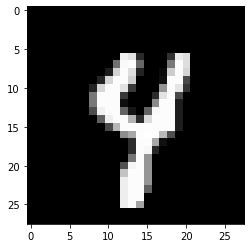

In [ ]:
picture(X_test[1010])